In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb


# Modeling Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, roc_auc_score,f1_score, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay, accuracy_score
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Displaying the first five rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Displaying the bottom 5 rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
# Displaying the shape and structure of the DataFrame

print(f"Shape of the DataFrame           : {df.shape}")
print(f"Total Number of Rows (Observations): {df.shape[0]}")
print(f"Total Number of Columns (Features) : {df.shape[1]}")

Shape of the DataFrame           : (1470, 35)
Total Number of Rows (Observations): 1470
Total Number of Columns (Features) : 35


In [7]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [8]:
# Displaying the number of unique values for each feature in the dataset
print(" Number of Unique Values per Column:\n")

for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column:<30} →  {unique_count} unique value(s)")

 Number of Unique Values per Column:

Age                            →  43 unique value(s)
Attrition                      →  2 unique value(s)
BusinessTravel                 →  3 unique value(s)
DailyRate                      →  886 unique value(s)
Department                     →  3 unique value(s)
DistanceFromHome               →  29 unique value(s)
Education                      →  5 unique value(s)
EducationField                 →  6 unique value(s)
EmployeeCount                  →  1 unique value(s)
EmployeeNumber                 →  1470 unique value(s)
EnvironmentSatisfaction        →  4 unique value(s)
Gender                         →  2 unique value(s)
HourlyRate                     →  71 unique value(s)
JobInvolvement                 →  4 unique value(s)
JobLevel                       →  5 unique value(s)
JobRole                        →  9 unique value(s)
JobSatisfaction                →  4 unique value(s)
MaritalStatus                  →  3 unique value(s)
MonthlyIncome     

In [9]:
# Encoding the target variable 'Attrition' to binary (Yes → 1, No → 0)
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [10]:
# Dropping irrelevant or constant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [11]:
# Displaying the shape and structure of the DataFrame

print(f"Shape of the DataFrame           : {df.shape}")
print(f"Total Number of Rows (Observations): {df.shape[0]}")
print(f"Total Number of Columns (Features) : {df.shape[1]}")


Shape of the DataFrame           : (1470, 31)
Total Number of Rows (Observations): 1470
Total Number of Columns (Features) : 31


**Correlation Analysis**

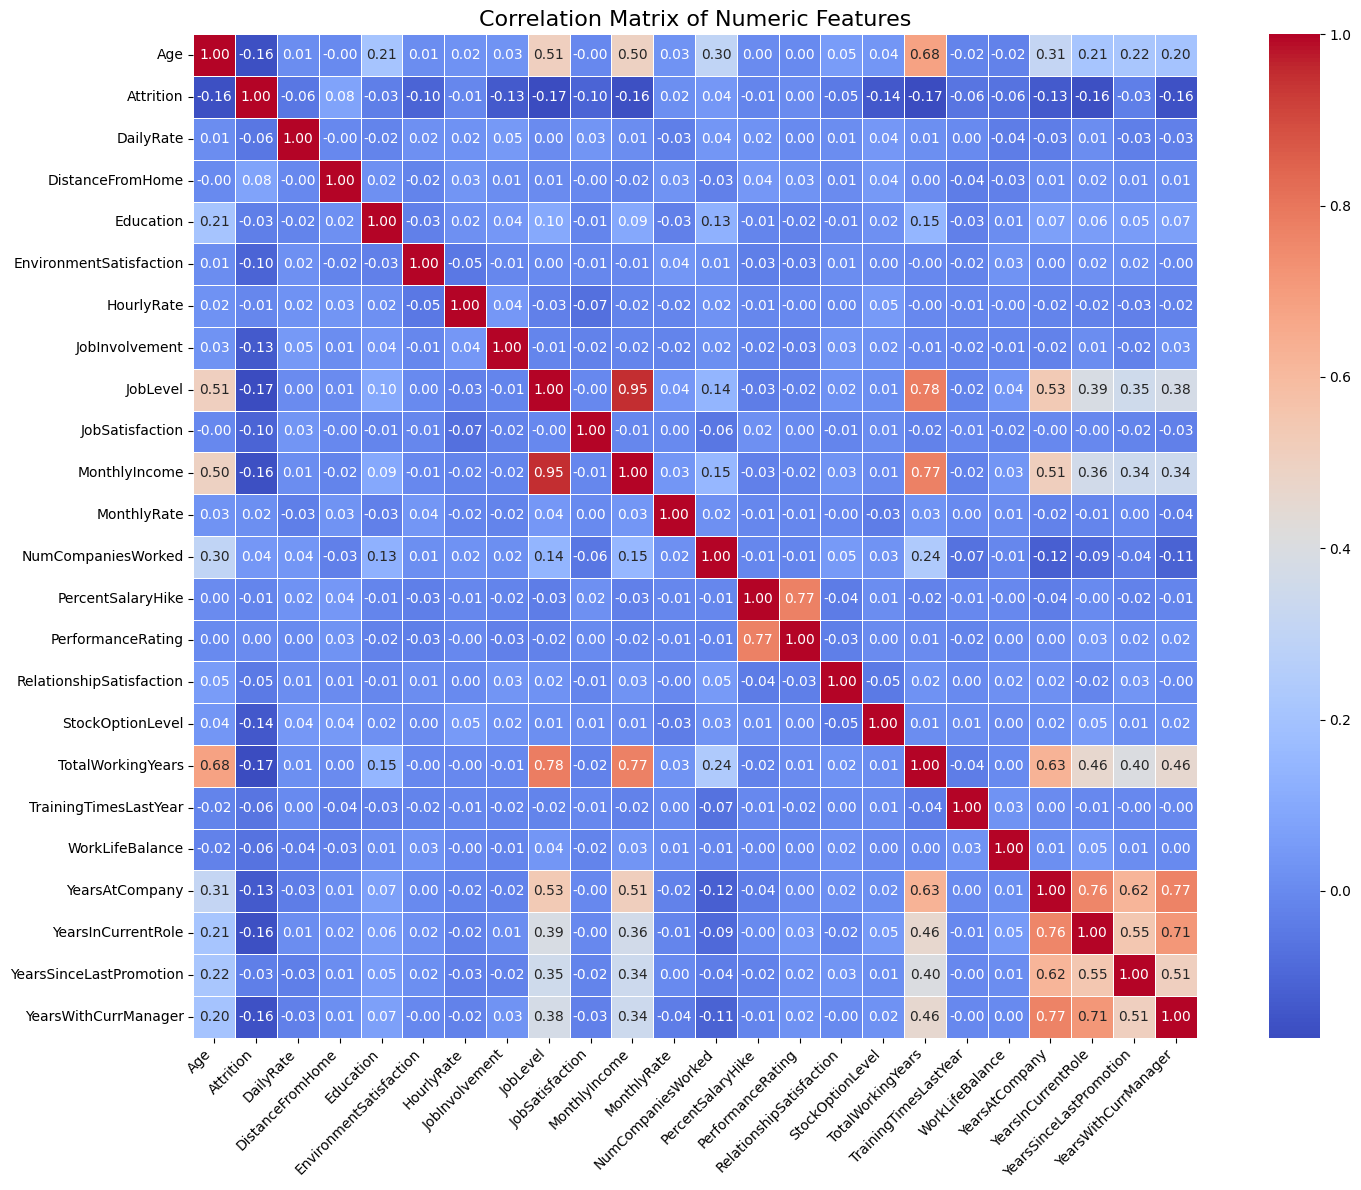

In [12]:
# Selecting only numeric columns for the correlation matrix
numeric_features = df.select_dtypes(include=[np.number])

# Computing the correlation matrix
correlation_matrix = numeric_features.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True,
    square=True
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Label Encoding and One-Hot Encoding**

In [13]:
# Identifying  Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f" Identified {len(categorical_cols)} categorical columns: {categorical_cols}")

# Separating Binary and Nominal Categorical Columns
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
nominal_cols = [col for col in categorical_cols if df[col].nunique() > 2]

print(f"\n Binary (Label Encoded) Columns ({len(binary_cols)}): {binary_cols}")
print(f" Nominal (One-Hot Encoded) Columns ({len(nominal_cols)}): {nominal_cols}")

# Label Encoding Binary Categorical Columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f" Label Encoded '{col}'")

# One-Hot Encoding Nominal Categorical Columns
if nominal_cols:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
    print(f"\n One-Hot Encoded Nominal Columns: {nominal_cols}")
else:
    print("\n No Nominal Columns to Encode.")


# Final Summary
print(f"\n Final dataset shape after encoding: {df.shape}")
print(" Preview of encoded dataset:")
display(df.head())


 Identified 7 categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

 Binary (Label Encoded) Columns (2): ['Gender', 'OverTime']
 Nominal (One-Hot Encoded) Columns (5): ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
 Label Encoded 'Gender'
 Label Encoded 'OverTime'

 One-Hot Encoded Nominal Columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

 Final dataset shape after encoding: (1470, 45)
 Preview of encoded dataset:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


**Feature Engineering**

In [14]:
## Feature Engineering: Derived Metrics for Attrition

##  Feature 1: Income Per Job Level
# Normalizes compensation across job levels to identify underpaid or overpaid employees
df['IncomePerJobLevel'] = np.where(
    df['JobLevel'].astype(float) > 0,
    df['MonthlyIncome'] / df['JobLevel'],
    df['MonthlyIncome']  # fallback if JobLevel is zero or missing
)

## Feature 2: Prior Experience-
# Captures external experience before joining the company (TotalWorkingYears - YearsAtCompany)
df['PriorExperience'] = (df['TotalWorkingYears'] - df['YearsAtCompany']).clip(lower=0)

## Feature 3: Manager Loyalty Ratio
# Ratio of years with current manager to years at company
df['ManagerLoyaltyRatio'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)

## Feature 4: Time Since Promotion Ratio
# Measures time since last promotion relative to company tenure
df['TimeSincePromotionRatio'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)

## Feature 5: Years Per Role
# Indicates how frequently an employee changes roles within the company
df['YearsPerRole'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1)

## Confirmation: New Feature Summary
print(" Feature engineering completed successfully.")
print(f" Updated dataset shape: {df.shape}\n")
print(" Preview of engineered features:")
display(df[['IncomePerJobLevel', 'PriorExperience', 'ManagerLoyaltyRatio',
            'TimeSincePromotionRatio', 'YearsPerRole']].head())


 Feature engineering completed successfully.
 Updated dataset shape: (1470, 50)

 Preview of engineered features:


,IncomePerJobLevel,PriorExperience,ManagerLoyaltyRatio,TimeSincePromotionRatio,YearsPerRole
0,2996.5,2,0.714286,0.000000,0.571429
1,2565.0,0,0.636364,0.090909,0.636364
2,2090.0,7,0.000000,0.000000,0.000000
3,2909.0,0,0.000000,0.333333,0.777778
4,3468.0,4,0.666667,0.666667,0.666667


**Feature Selection**

 Retained 49 features after low-variance filtering.

 Retained 32 features after correlation filtering.

 Selected top 20 features based on Random Forest importance.
 Final shape of selected feature matrix: (1470, 20)



,Feature,Importance
0,MonthlyIncome,0.077463
1,Age,0.072558
2,DailyRate,0.065025
3,IncomePerJobLevel,0.064963
4,TotalWorkingYears,0.061528
5,DistanceFromHome,0.056045
6,OverTime,0.043273
7,YearsAtCompany,0.041452
8,ManagerLoyaltyRatio,0.040877
9,EnvironmentSatisfaction,0.038774


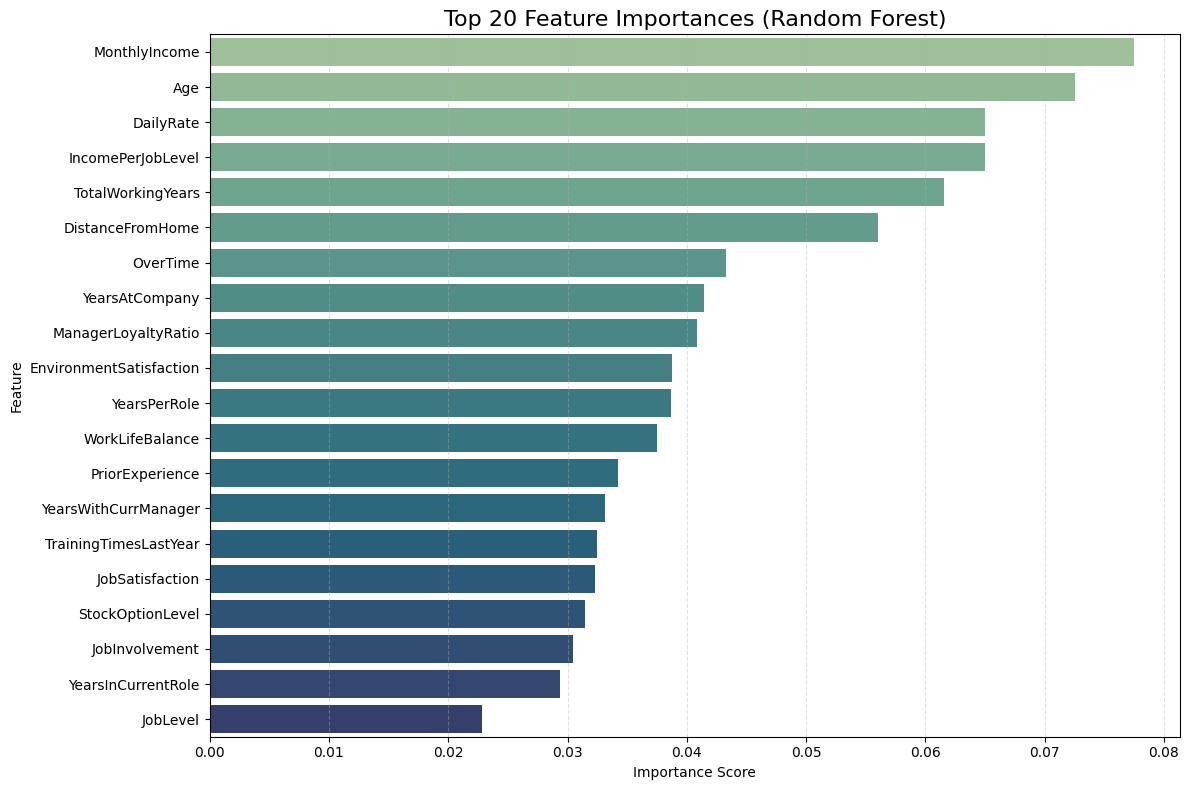

In [15]:
## Defining Features and Target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

##  Low-Variance Feature Filtering
# Removing features with variance < 1%
variance_thresh = VarianceThreshold(threshold=0.01)
X_var_filtered = variance_thresh.fit_transform(X)

# Keeping only high-variance columns
high_variance_cols = X.columns[variance_thresh.get_support()]
X = X[high_variance_cols]

print(f" Retained {X.shape[1]} features after low-variance filtering.\n")

## Correlation with Target
# Adding target temporarily for correlation calculation
X_corr = X.copy()
X_corr['Attrition'] = y
corr_matrix = X_corr.corr()

# Dropping 'Attrition' and select features with |correlation| > 0.05
target_corr = corr_matrix['Attrition'].drop('Attrition')
selected_corr_features = target_corr[abs(target_corr) > 0.05].index.tolist()
X = X[selected_corr_features]

print(f" Retained {len(X.columns)} features after correlation filtering.\n")

## Feature Importance via Random Forest
# Train/test split for model-based selection
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Training Random Forest to compute feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Storing importance scores in a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Selecting top N = 20 features
top_n = 20
top_features = feature_importance_df['Feature'].head(top_n).tolist()
X_selected = X[top_features]

# Output summary
print(f" Selected top {top_n} features based on Random Forest importance.")
print(f" Final shape of selected feature matrix: {X_selected.shape}\n")
display(feature_importance_df.head(top_n))


# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance_df.head(top_n),
    x='Importance', y='Feature',
    palette='crest'
)
plt.title(f'Top {top_n} Feature Importances (Random Forest)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [16]:
## Finalizing the Feature set before modeling
# Validating Alignment Between Feature Matrix and Target
try:
    assert X_selected.shape[0] == y.shape[0], "Mismatch: Features and target length are not equal!"
    print(" Feature matrix and target variable are properly aligned.")
except AssertionError as e:
    print(e)
    raise

# Reviewing the Selected Features
print("\n Selected Features for Modeling:")
if 'top_features' in locals() and isinstance(top_features, list):
    for idx, feat in enumerate(top_features, start=1):
        print(f"{idx:2d}. {feat}")
else:
    print(" Warning: 'top_features' not found or not in expected format.")

 Feature matrix and target variable are properly aligned.

 Selected Features for Modeling:
 1. MonthlyIncome
 2. Age
 3. DailyRate
 4. IncomePerJobLevel
 5. TotalWorkingYears
 6. DistanceFromHome
 7. OverTime
 8. YearsAtCompany
 9. ManagerLoyaltyRatio
10. EnvironmentSatisfaction
11. YearsPerRole
12. WorkLifeBalance
13. PriorExperience
14. YearsWithCurrManager
15. TrainingTimesLastYear
16. JobSatisfaction
17. StockOptionLevel
18. JobInvolvement
19. YearsInCurrentRole
20. JobLevel


**Testing and Training of Data**

In [17]:
# Finalizing Feature Matrix and Target
X_selected = X[top_features]   # Ensure top_features is defined from previous step
y = df['Attrition']            # Target variable


#  Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(" Train-test split completed.")
print(f" X_train shape: {X_train.shape}")
print(f" X_test  shape: {X_test.shape}")

# Feature Scaling (Standardization)
# Only required for models sensitive to feature magnitude (e.g., Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Feature scaling applied using StandardScaler.")


 Train-test split completed.
 X_train shape: (1176, 20)
 X_test  shape: (294, 20)

 Feature scaling applied using StandardScaler.


**Model Selection and Training**

In [21]:
def train_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predicting the class labels and probabilities on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculating the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Computing the Precision-Recall curve and area under the curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_vals, precision_vals)

    # Displaying the evaluation metrics
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy       : {accuracy:.4f}")
    print(f"Recall         : {recall:.4f}")
    print(f"Precision      : {precision:.4f}")
    print(f"ROC-AUC Score  : {roc_auc:.4f}")
    print(f"PR-AUC Score   : {pr_auc:.4f}\n")

    # Generating and displaying the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Plotting the ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Plotting the Precision-Recall Curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall_vals, precision_vals, color='green', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()



Logistic Regression Evaluation Metrics:
Accuracy       : 0.8776
Recall         : 0.3617
Precision      : 0.7391
ROC-AUC Score  : 0.7706
PR-AUC Score   : 0.5200

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.89      0.98      0.93       247
        Left       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



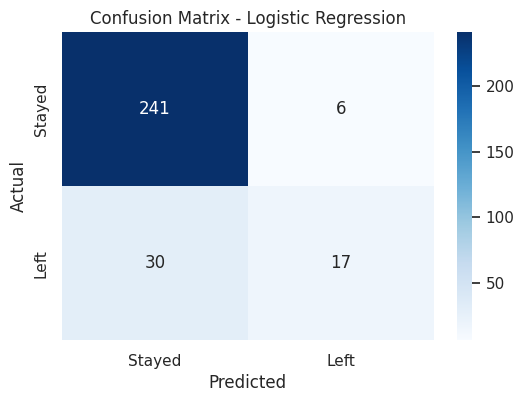

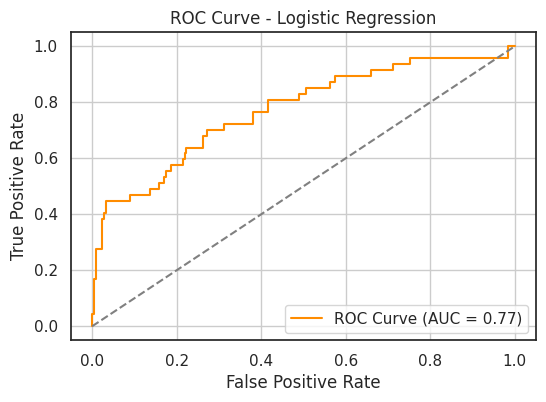

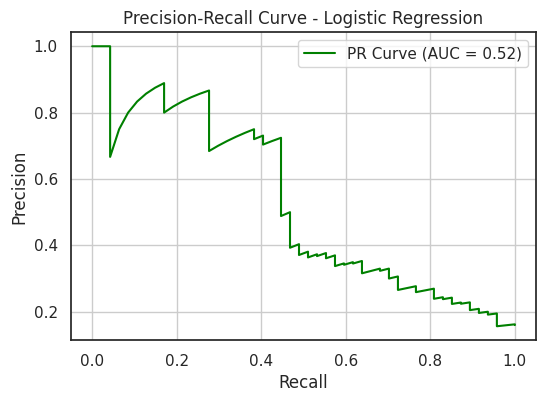


Random Forest Evaluation Metrics:
Accuracy       : 0.8265
Recall         : 0.1489
Precision      : 0.3889
ROC-AUC Score  : 0.7671
PR-AUC Score   : 0.3819

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.90       247
        Left       0.39      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.62      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294



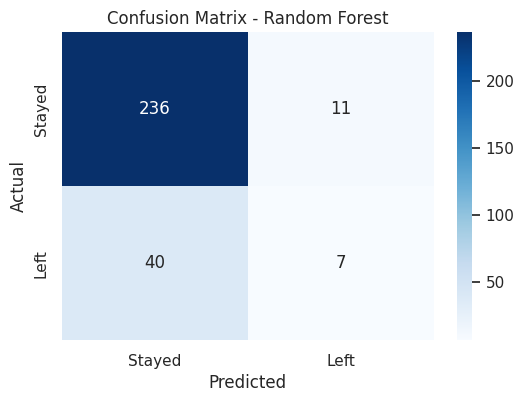

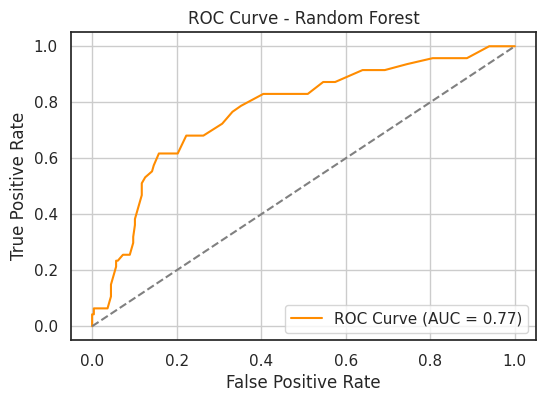

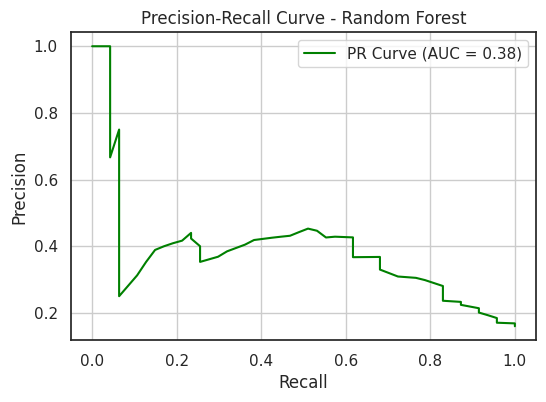


Support Vector Machine Evaluation Metrics:
Accuracy       : 0.8503
Recall         : 0.1489
Precision      : 0.6364
ROC-AUC Score  : 0.7542
PR-AUC Score   : 0.4552

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.98      0.92       247
        Left       0.64      0.15      0.24        47

    accuracy                           0.85       294
   macro avg       0.75      0.57      0.58       294
weighted avg       0.82      0.85      0.81       294



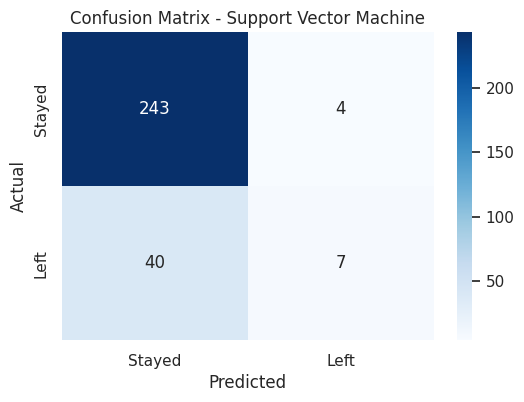

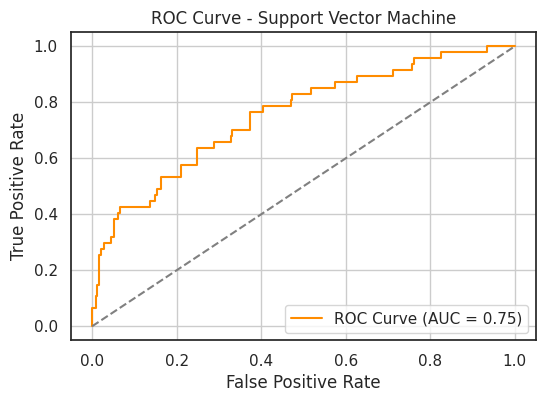

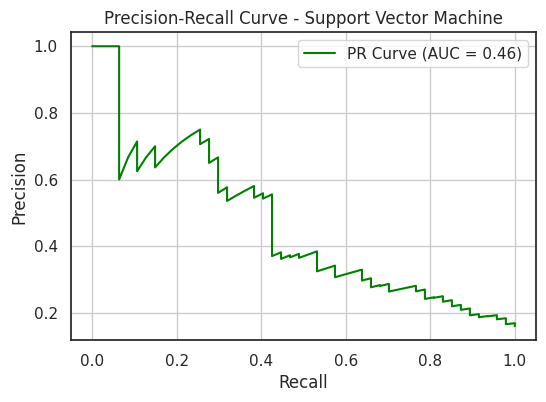


K-Nearest Neighbors Evaluation Metrics:
Accuracy       : 0.8469
Recall         : 0.2340
Precision      : 0.5500
ROC-AUC Score  : 0.6167
PR-AUC Score   : 0.3569

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.91       247
        Left       0.55      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294



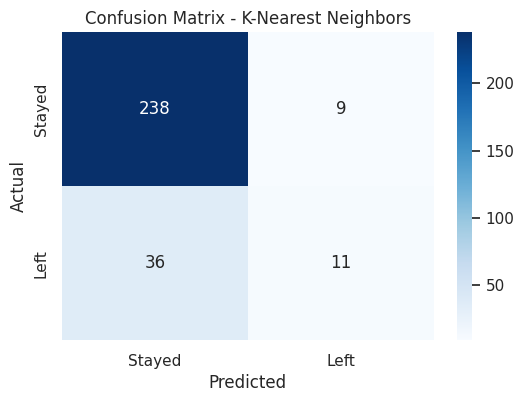

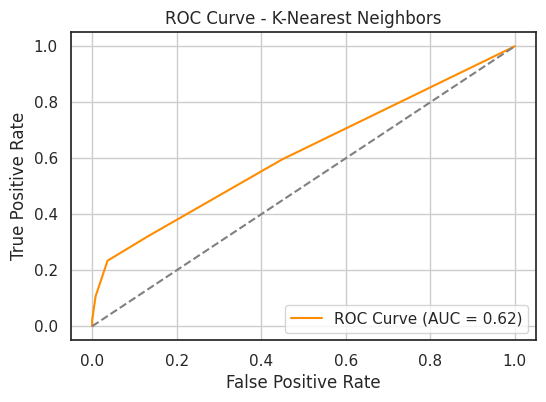

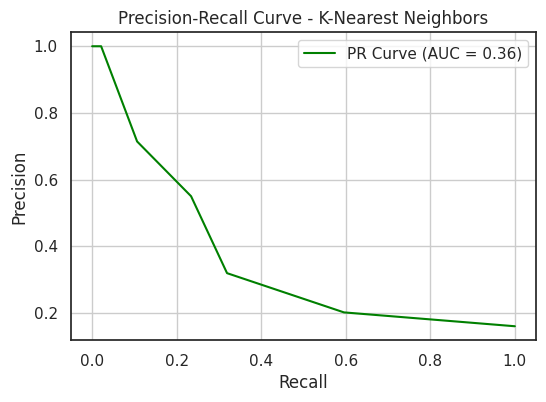


XGBoost Evaluation Metrics:
Accuracy       : 0.8469
Recall         : 0.2553
Precision      : 0.5455
ROC-AUC Score  : 0.7674
PR-AUC Score   : 0.4841

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.91       247
        Left       0.55      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.71      0.61      0.63       294
weighted avg       0.82      0.85      0.82       294



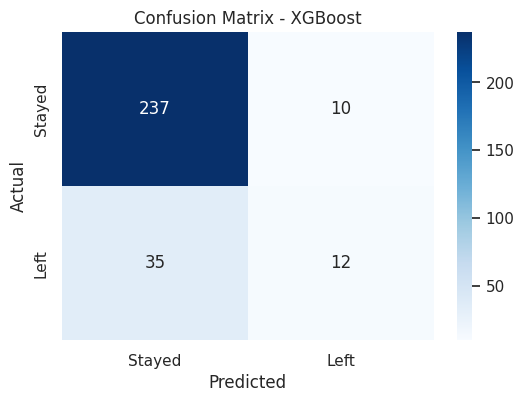

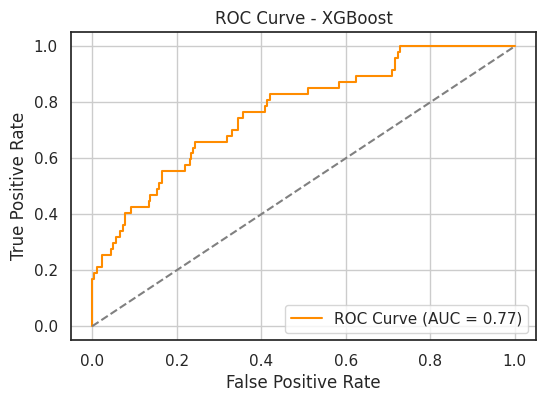

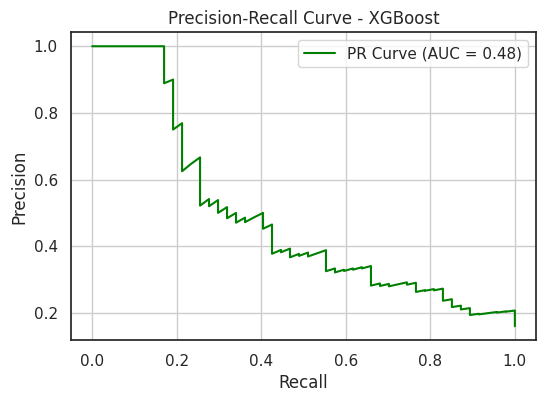

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632

LightGBM Evaluation Metrics:
Accuracy       : 0.8435
Recall         : 0.2979
Precision      : 0.5185
ROC-AUC Score  : 0.7930
PR-AUC Score   : 0.4487

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.88      0.95      0.91       247
        Left       0.52      0.30      0.38        47

    accuracy                           0.84       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.82      0.84      0.83       294



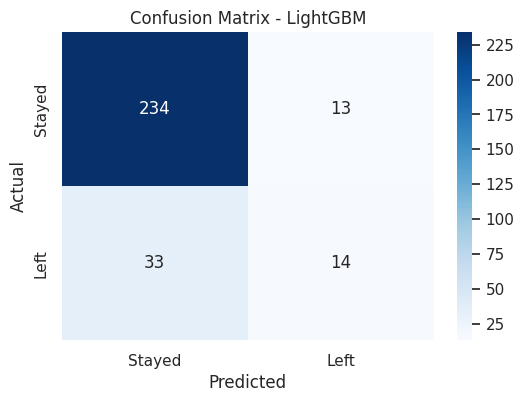

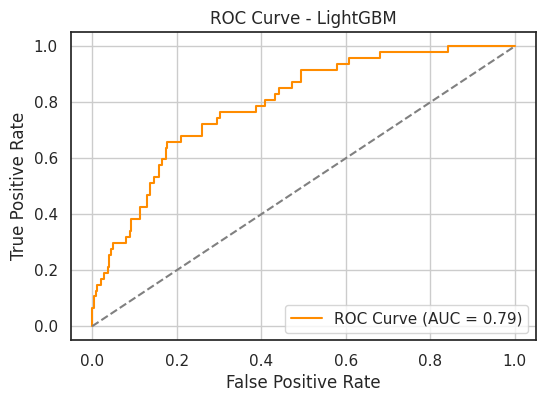

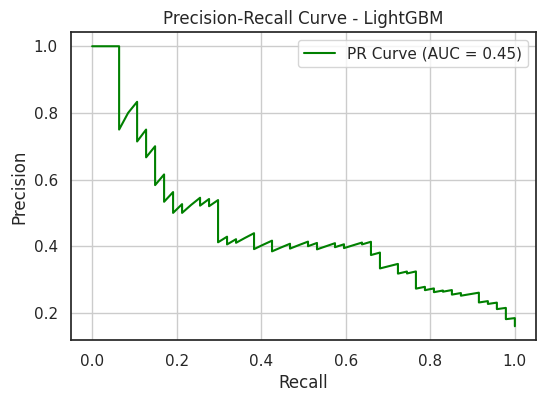


AdaBoost Evaluation Metrics:
Accuracy       : 0.8231
Recall         : 0.1915
Precision      : 0.3913
ROC-AUC Score  : 0.8147
PR-AUC Score   : 0.4250

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.94      0.90       247
        Left       0.39      0.19      0.26        47

    accuracy                           0.82       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.78      0.82      0.80       294



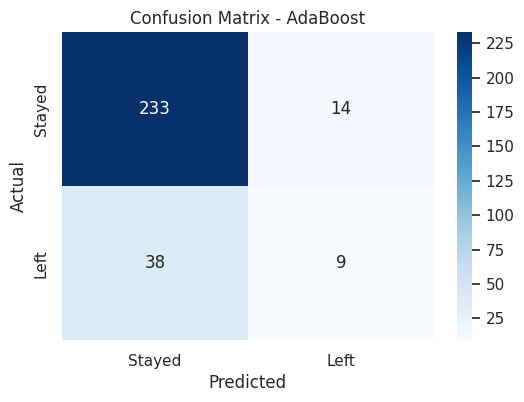

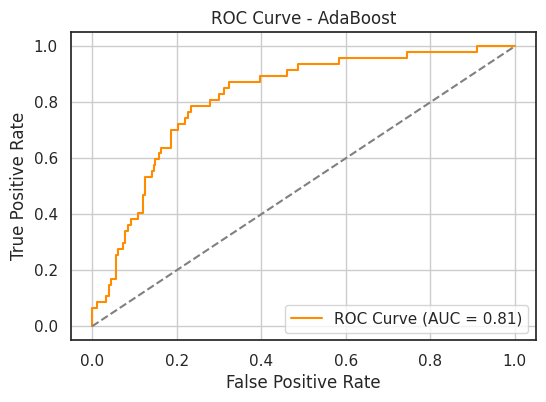

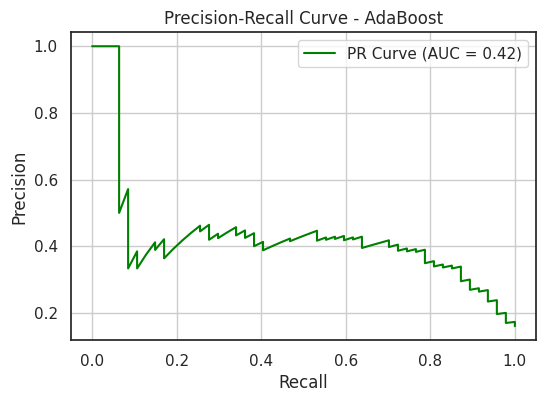

In [22]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
train_evaluate_model(logreg, "Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf, "Random Forest", X_train_scaled, X_test_scaled, y_train, y_test)

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
train_evaluate_model(svm, "Support Vector Machine", X_train_scaled, X_test_scaled, y_train, y_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
train_evaluate_model(knn, "K-Nearest Neighbors", X_train_scaled, X_test_scaled, y_train, y_test)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_evaluate_model(xgb, "XGBoost", X_train_scaled, X_test_scaled, y_train, y_test)

# LightGBM
lgbm = LGBMClassifier(random_state=42)
train_evaluate_model(lgbm, "LightGBM", X_train_scaled, X_test_scaled, y_train, y_test)

# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
train_evaluate_model(adaboost, "AdaBoost", X_train_scaled, X_test_scaled, y_train, y_test)

**Model Evaluation**


 Model Performance Prioritizing Recall:
                 Model  Recall  ROC-AUC Score
   Logistic Regression  0.3617         0.7706
              LightGBM  0.2979         0.7930
               XGBoost  0.2553         0.7674
   K-Nearest Neighbors  0.2340         0.6167
              AdaBoost  0.1915         0.8147
Support Vector Machine  0.1489         0.7542
         Random Forest  0.1489         0.7671

 Recommended Model: **Logistic Regression** (Highest Recall = 0.3617)


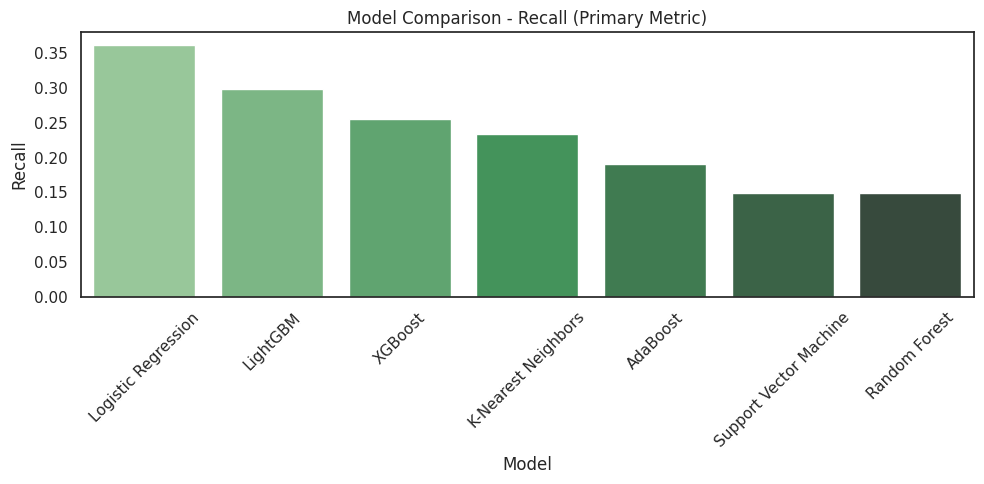

In [23]:
from sklearn.metrics import recall_score, roc_auc_score

def extract_model_metrics_by_recall(model, model_name, X_test, y_test):
    """
    Extract Recall and ROC-AUC score from a trained model.
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    return {
        "Model": model_name,
        "Recall": round(recall, 4),
        "ROC-AUC Score": round(roc_auc, 4)
    }


# Collecting metrics for all trained models
trained_models = {
    "Logistic Regression": logreg,
    "Support Vector Machine": svm,
    "K-Nearest Neighbors": knn,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "AdaBoost": adaboost
}


# Extracting metrics prioritizing recall
model_metrics = [
    extract_model_metrics_by_recall(model, name, X_test_scaled, y_test)
    for name, model in trained_models.items()
]

# Creating DataFrame and sort by Recall descending
metrics_df = pd.DataFrame(model_metrics)
metrics_df_sorted = metrics_df.sort_values(by='Recall', ascending=False).reset_index(drop=True)

# Displaying the comparison table
print("\n Model Performance Prioritizing Recall:")
print(metrics_df_sorted.to_string(index=False))

# Recommending the best model based on recall
best_model_name = metrics_df_sorted.iloc[0]['Model']
best_model_recall = metrics_df_sorted.iloc[0]['Recall']
print(f"\n Recommended Model: **{best_model_name}** (Highest Recall = {best_model_recall})")


sns.set(style="white")

# Plotting Recall Scores (main metric)
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df_sorted, x='Model', y='Recall', palette='Greens_d')
plt.title('Model Comparison - Recall (Primary Metric)')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Hyperparameter Tuning**

**Tuning Hyperparameters to Maximize Recall (GridSearchCV)**

In [24]:
# Defining parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    }
}

# Defining the model instances
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}
# Dictionary to store the best estimators
best_estimators = {}

# Running GridSearchCV for each model
for model_name, model in models.items():
    print(f"\n Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='recall',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f" Best parameters for {model_name}: {grid_search.best_params_}")
    print(f" Best cross-validated recall: {grid_search.best_score_:.4f}")




 Tuning Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
 Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
 Best cross-validated recall: 0.3053

 Tuning Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
 Best cross-validated recall: 0.3526

 Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Best parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
 Best cross-validated recall: 0.2526

 Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Best cross-validated recall: 0.2316

 Tuning XGBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best pa


Logistic Regression (Tuned) Evaluation Metrics:
Accuracy       : 0.8776
Recall         : 0.3617
Precision      : 0.7391
ROC-AUC Score  : 0.7722
PR-AUC Score   : 0.5209

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.89      0.98      0.93       247
        Left       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



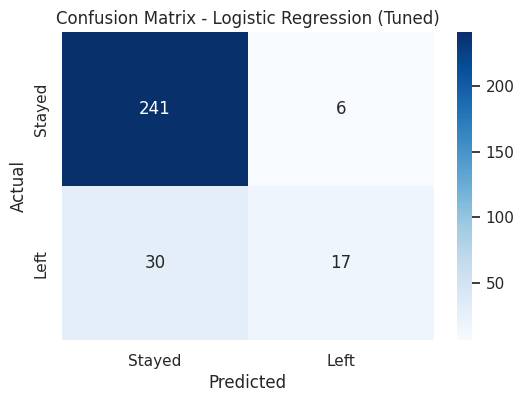

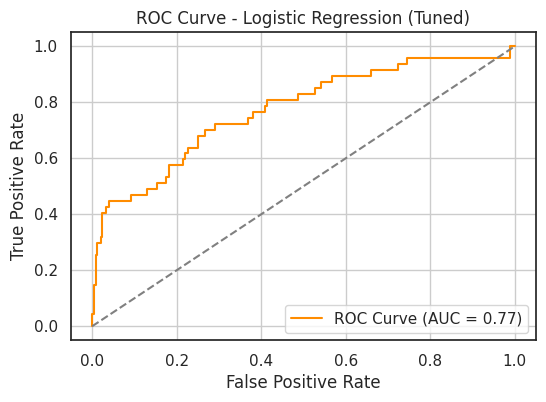

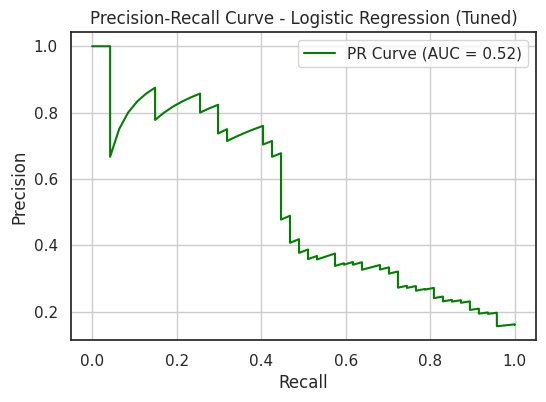


Support Vector Machine (Tuned) Evaluation Metrics:
Accuracy       : 0.8537
Recall         : 0.4255
Precision      : 0.5556
ROC-AUC Score  : 0.7544
PR-AUC Score   : 0.4837

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.90      0.94      0.91       247
        Left       0.56      0.43      0.48        47

    accuracy                           0.85       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.84      0.85      0.85       294



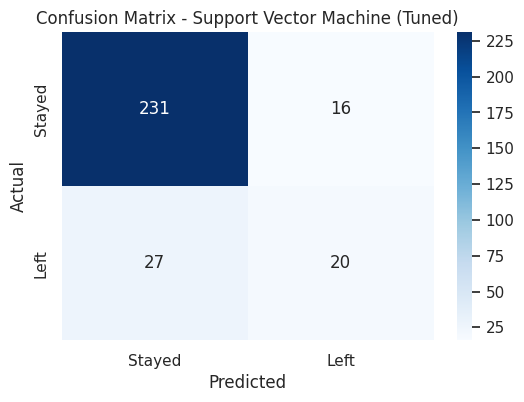

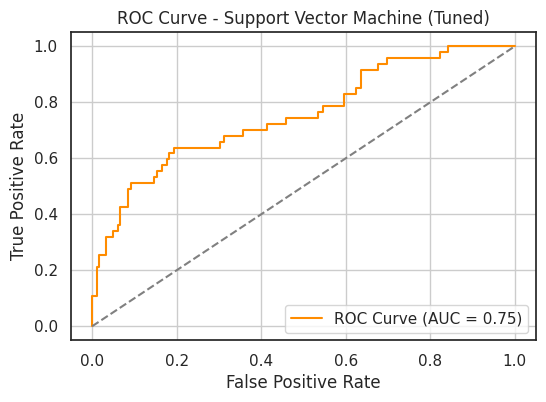

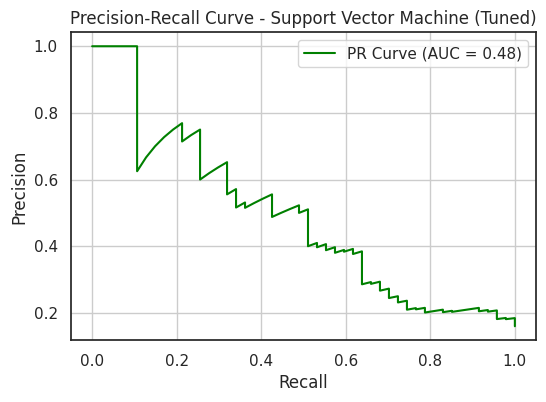


K-Nearest Neighbors (Tuned) Evaluation Metrics:
Accuracy       : 0.8333
Recall         : 0.2553
Precision      : 0.4615
ROC-AUC Score  : 0.6646
PR-AUC Score   : 0.4189

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.94      0.90       247
        Left       0.46      0.26      0.33        47

    accuracy                           0.83       294
   macro avg       0.67      0.60      0.62       294
weighted avg       0.80      0.83      0.81       294



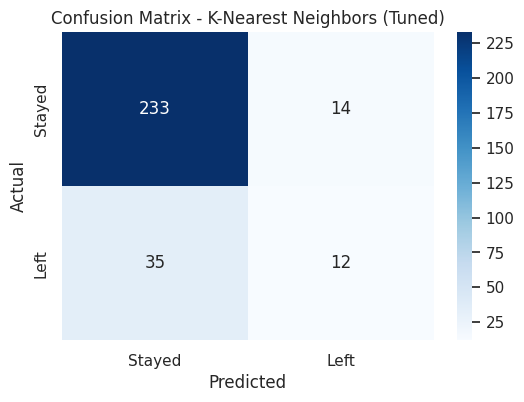

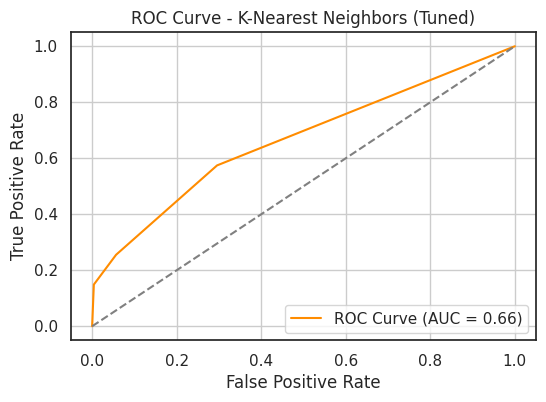

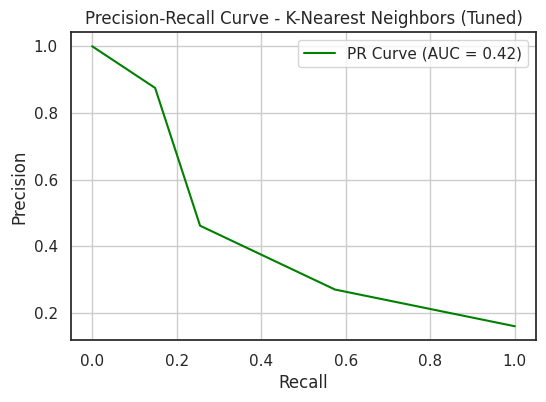


Random Forest (Tuned) Evaluation Metrics:
Accuracy       : 0.8265
Recall         : 0.1489
Precision      : 0.3889
ROC-AUC Score  : 0.7671
PR-AUC Score   : 0.3819

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.90       247
        Left       0.39      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.62      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294



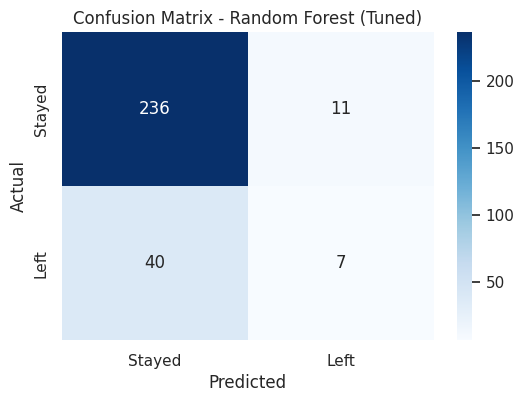

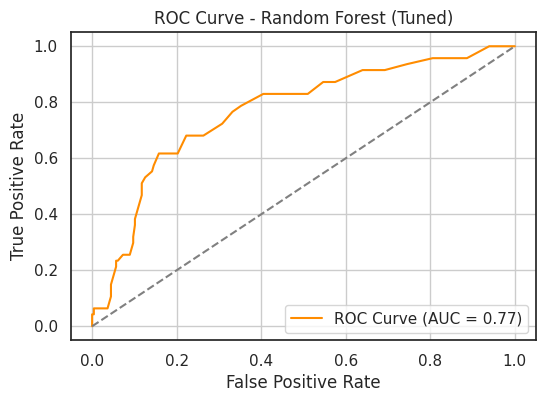

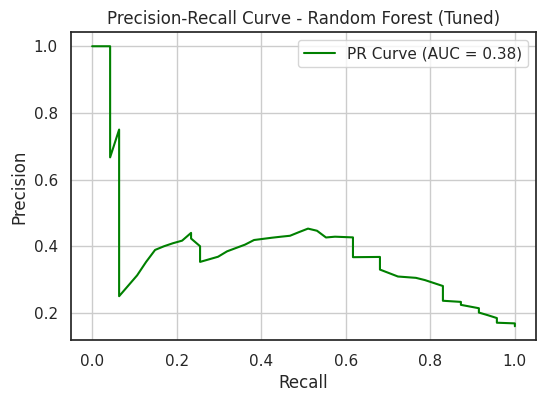


XGBoost (Tuned) Evaluation Metrics:
Accuracy       : 0.8503
Recall         : 0.2766
Precision      : 0.5652
ROC-AUC Score  : 0.8146
PR-AUC Score   : 0.5116

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.87      0.96      0.92       247
        Left       0.57      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.72      0.62      0.64       294
weighted avg       0.83      0.85      0.83       294



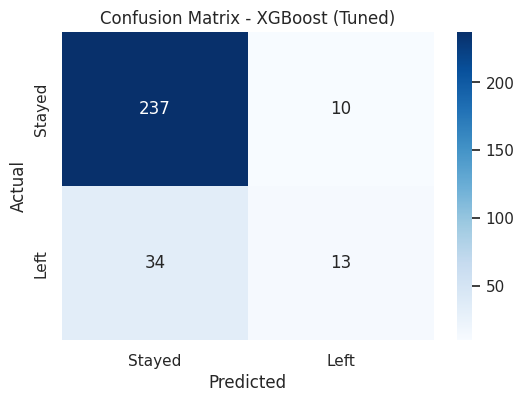

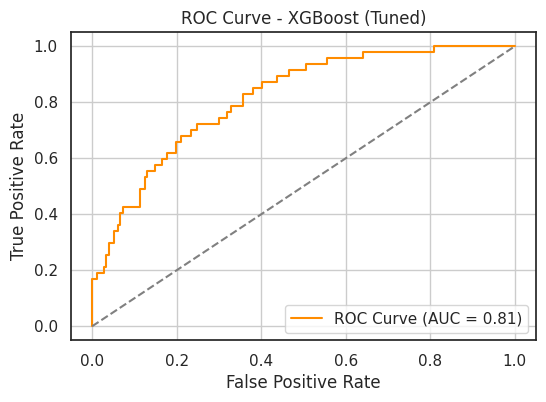

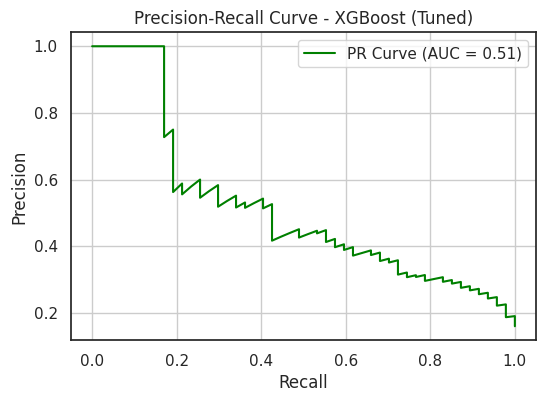

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

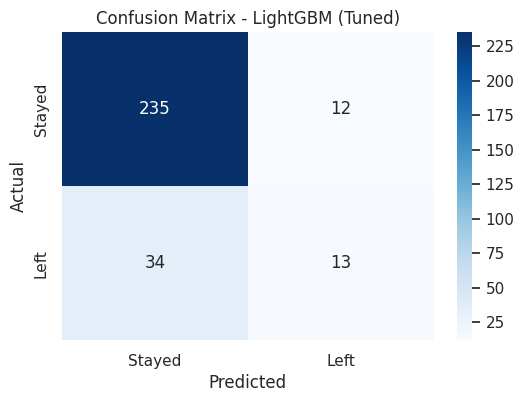

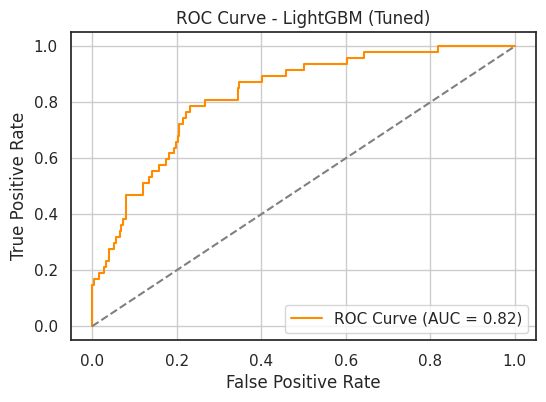

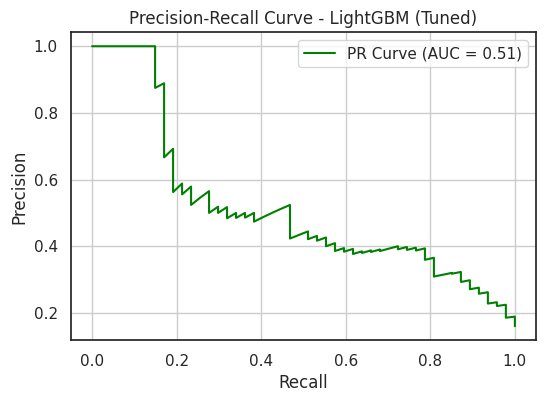


AdaBoost (Tuned) Evaluation Metrics:
Accuracy       : 0.8231
Recall         : 0.1915
Precision      : 0.3913
ROC-AUC Score  : 0.8147
PR-AUC Score   : 0.4250

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.94      0.90       247
        Left       0.39      0.19      0.26        47

    accuracy                           0.82       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.78      0.82      0.80       294



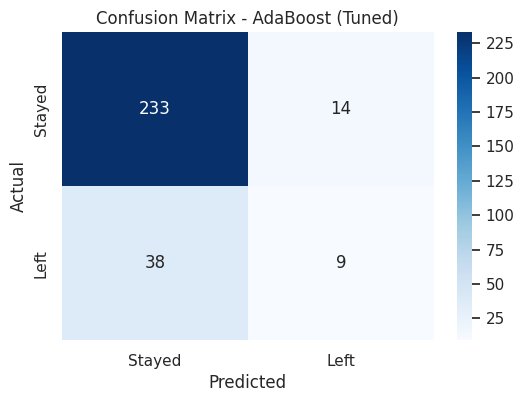

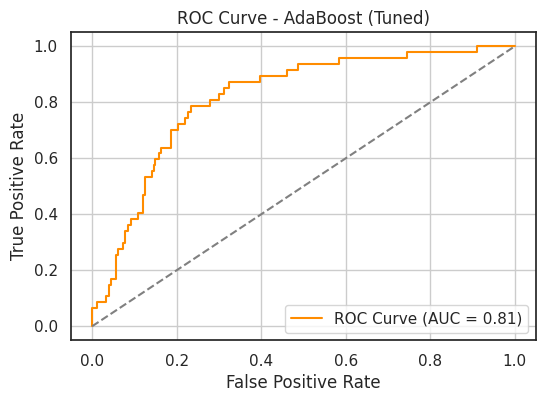

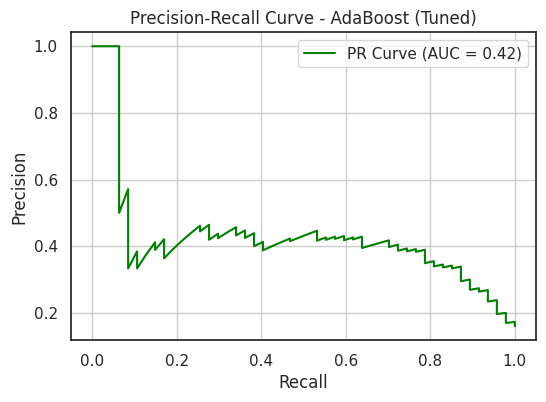

In [25]:
for model_name, model in best_estimators.items():
    train_evaluate_model(model, f"{model_name} (Tuned)", X_train_scaled, X_test_scaled, y_train, y_test)


**Model Evaluation after Tuning**


 Tuned Model Comparison (Sorted by Recall):
                 Model  Recall  ROC-AUC Score
Support Vector Machine  0.4255         0.7544
   Logistic Regression  0.3617         0.7722
               XGBoost  0.2766         0.8146
              LightGBM  0.2766         0.8247
   K-Nearest Neighbors  0.2553         0.6646
              AdaBoost  0.1915         0.8147
         Random Forest  0.1489         0.7671


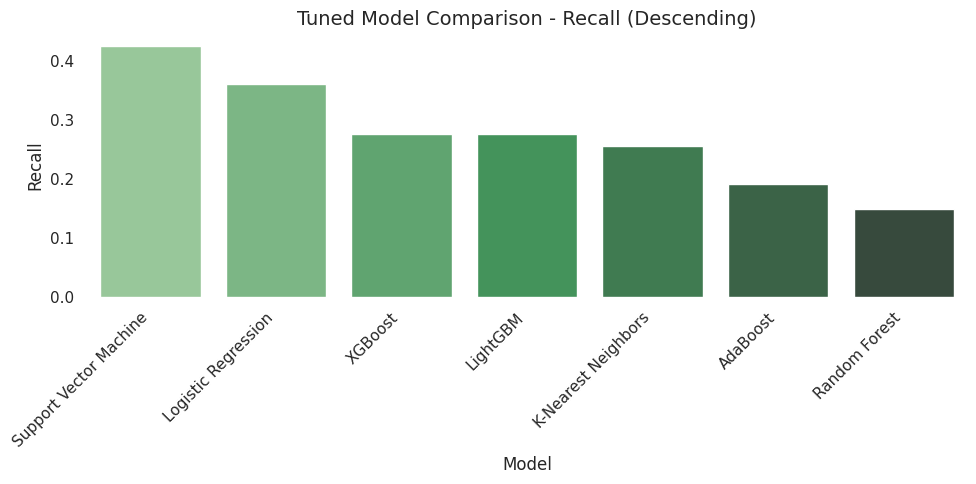


 Recommended model based on highest Recall:
Model   : Support Vector Machine
Recall  : 0.4255
ROC-AUC : 0.7544


In [26]:
# Collecting evaluation metrics
tuned_metrics = []

for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    tuned_metrics.append({
        "Model": model_name,
        "Recall": round(recall, 4),
        "ROC-AUC Score": round(roc_auc, 4)
    })

# Creating DataFrame
tuned_df = pd.DataFrame(tuned_metrics)
tuned_df_sorted = tuned_df.sort_values(by='Recall', ascending=False).reset_index(drop=True)

print("\n Tuned Model Comparison (Sorted by Recall):")
print(tuned_df_sorted.to_string(index=False))


# Plotting Recall Scores
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.barplot(data=tuned_df_sorted, x='Model', y='Recall', palette='Greens_d')
plt.title('Tuned Model Comparison - Recall (Descending)', fontsize=14)
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

# Sorting by Recall descending (highest recall first)
best_by_recall_df = tuned_df.sort_values(by='Recall', ascending=False).reset_index(drop=True)

# Picking the best model based on Recall
best_model = best_by_recall_df.iloc[0]

# Displaying the best model
print(f"\n Recommended model based on highest Recall:")
print(f"Model   : {best_model['Model']}")
print(f"Recall  : {best_model['Recall']}")
print(f"ROC-AUC : {best_model['ROC-AUC Score']}")


**Feature Importance (Permutation) – SVM with RBF, Scoring by Recall**

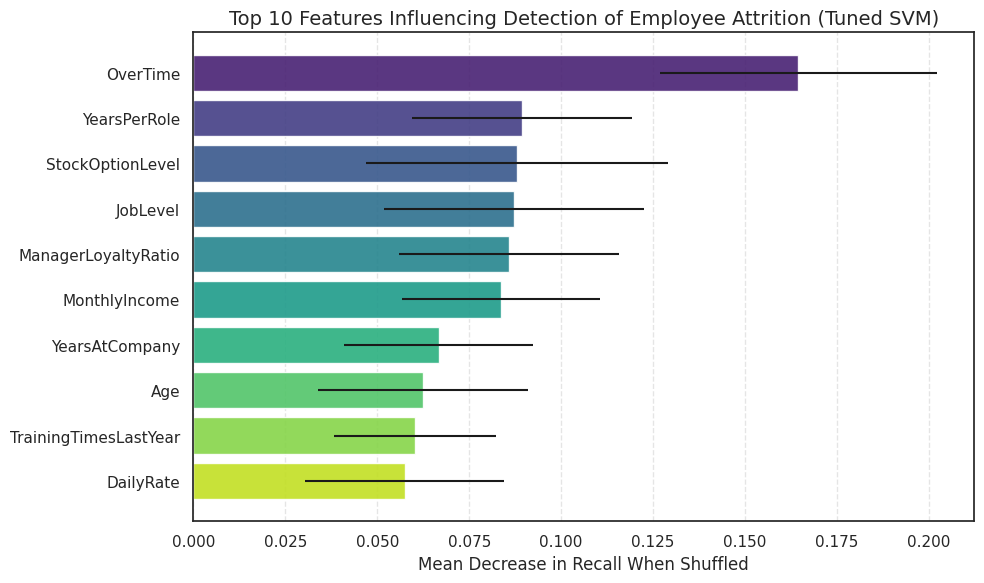

 Interpretation of Permutation Importance (Scoring by Recall):

- Features shown here most affect the model’s ability to recall (catch) attrition cases.
- Higher values indicate a greater drop in recall when the feature is randomized.
- Standard deviation reflects consistency across multiple shuffles.


 Top 5 Most Influential Features influencing the detection of Employee Attrition:
 OverTime — Importance: 0.1645 ± 0.0376
 YearsPerRole — Importance: 0.0894 ± 0.0298
 StockOptionLevel — Importance: 0.0879 ± 0.0410
 JobLevel — Importance: 0.0872 ± 0.0353
 ManagerLoyaltyRatio — Importance: 0.0858 ± 0.0298


In [29]:
# Using the best tuned SVM model (with RBF kernel)
model = best_estimators['Support Vector Machine']

# Converting scaled test data to DataFrame to retain feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Computing permutation importance using Recall as scoring
result = permutation_importance(
    estimator=model,
    X=X_test_scaled_df,
    y=y_test,
    scoring='recall',
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

# Creating DataFrame from result
perm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_STD': result.importances_std
})

# Sorting and selecting top 10 features
perm_df_sorted = perm_df.sort_values(by='Importance_Mean', ascending=False)
top_features = perm_df_sorted.head(10)

# Plotting with barh and error bars
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(top_features))
plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance_Mean'],
    xerr=top_features['Importance_STD'],
    color=colors,
    alpha=0.9
)
plt.xlabel('Mean Decrease in Recall When Shuffled', fontsize=12)
plt.title('Top 10 Features Influencing Detection of Employee Attrition (Tuned SVM)', fontsize=14)
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Printing interpretation
print(" Interpretation of Permutation Importance (Scoring by Recall):")
print("""
- Features shown here most affect the model’s ability to recall (catch) attrition cases.
- Higher values indicate a greater drop in recall when the feature is randomized.
- Standard deviation reflects consistency across multiple shuffles.
""")

# Printing the top 5 features
print("\n Top 5 Most Influential Features influencing the detection of Employee Attrition:")
for _, row in top_features.head(5).iterrows():
    print(f" {row['Feature']} — Importance: {row['Importance_Mean']:.4f} ± {row['Importance_STD']:.4f}")


**Top 10 Features Influencing Detection of Employee Attrition (Recall) – Key Insights & Recommendations**

**1. OverTime**

**Insight:**

Employees working overtime are significantly more likely to be correctly flagged by the model as at risk of attrition. This likely reflects overwork, burnout, or poor work-life balance.

**Recommendation:**

- Monitor overtime trends across departments.

- Implement work-life balance policies (e.g., overtime caps, mental health days).

- Proactively check in with high-overtime employees to prevent burnout.


**2. YearsPerRole**

**Insight:**

Longer tenure in the same role, without a promotion or lateral move, appears linked with higher attrition risk—possibly due to career stagnation or lack of growth opportunities.

**Recommendation:**

- Develop clear role progression paths.

- Encourage internal mobility every 2–3 years.

- Offer mentoring or development plans for employees “stuck” in the same role.


**3. StockOptionLevel**

**Insight:**
Stock options may serve as a retention mechanism. Employees with higher stock option levels are more likely to stay, while those without equity may be more inclined to leave.

**Recommendation:**

- Introduce or expand stock option programs, especially for mid-career staff.

- Link long-term incentives to retention milestones.

- Communicate equity benefits clearly to boost perceived value.


**4. JobLevel**

**Insight:**

Job level is tied to attrition likelihood—likely due to differences in compensation, decision-making power, or perceived value within the organization.

**Recommendation:**

- Ensure career pathing from entry-level roles is well structured.

- Review responsibilities and pay alignment across job levels.

- Identify and address turnover patterns in specific levels (e.g., mid-management).


**5. ManagerLoyaltyRatio**

**Insight:**

A strong correlation exists between manager stability and employee retention. Employees who experience frequent managerial changes may feel unsupported or disconnected.

**Recommendation:**

- Improve manager retention and continuity.

- Ensure new managers are trained in team engagement.

- Consider team restructuring only when necessary and with communication plans.


**6. MonthlyIncome**

**Insight:**

Lower monthly income is associated with higher attrition risk. The model relies on this feature to help detect those most likely to leave.

**Recommendation:**

- Review pay competitiveness, especially for roles with high turnover.

- Conduct equity audits to ensure fairness.

- Tie compensation to impact and development milestones.


**7. YearsAtCompany**

**Insight:**

Attrition patterns vary by tenure. Those in the early-mid tenure window may be more vulnerable, especially if expectations aren’t met or career progression stalls.

**Recommendation:**

- Create tenure-based retention strategies (e.g., milestone rewards, sabbaticals).

- Engage employees between years 2–5 with growth plans.

- Use exit data to understand why mid-tenure employees leave.


**8. Age**

**Insight:**

Certain age groups may show higher attrition risks—either due to early-career restlessness or mid-career re-evaluation.

**Recommendation:**

- Avoid one-size-fits-all retention programs.

- Tailor engagement strategies for generational needs (e.g., flexibility, autonomy, mentorship).

- Use age trends to inform benefit design and policy.


**9. TrainingTimesLastYear**

**Insight:**

Employees who received little to no training were more likely to be flagged as attrition risks. Training may enhance engagement and perceived growth.

**Recommendation:**

- Increase access to training and development programs.

- Track participation and impact of learning initiatives.

- Tie training access to career pathways and internal mobility.


**10. DailyRate**

**Insight:**

Lower daily rates may correlate with under-compensation or lack of recognition, which can contribute to dissatisfaction and attrition risk.

**Recommendation:**

- Conduct pay audits to ensure fair daily/hourly compensation.

- Recognize and reward performance beyond salary.

- Explore total rewards beyond base pay (bonuses, flexibility, well-being).

